In [489]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Darbo uždaviniai:

1. Nustatyti SARS-CoV-2 viruso susirūpinimą keliančių atmainų (Alpha, Delta ir Omicron) paplitimo pokyčius Lietuvoje 2021 m.

2. Palyginti sergamumą COVID-19 liga pagal lytį ir amžių 2021 m. Lietuvoje laikotarpiais, kai šalyje dominavo 
susirūpinimą keliančios SARS-CoV-2 viruso atmainos.

PIRMAS UŽDAVINYS

In [490]:
# Atidaromas failas su sekoskaitos duomenimis ES šalyse

data = pd.read_csv('data.csv')

# iš ES ir EEE duomenų už 2020-2022 metus ir iš dviejų duomenų šaltinių (Tessy ir GISAID) išrenkami tik Lietuvos duomenys už 2021 metus, duomenų šaltinis GISAID.
atmainos = ((data[(data['year_week'].str.contains('2021(?!$)')) & (data['country'] == 'Lithuania') & (data['source'] == 'GISAID')])[['year_week', 'variant', 'percent_variant']]).dropna(subset=['percent_variant'])
atmainos[['year', 'week']]=atmainos['year_week'].str.split('-', expand=True)

In [491]:
atmainos['week'] = atmainos['week'].str.lstrip('0')
atmainos['week']=pd.to_numeric(atmainos['week'])

In [492]:
atmainos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 126303 to 128850
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_week        2548 non-null   object 
 1   variant          2548 non-null   object 
 2   percent_variant  2548 non-null   float64
 3   year             2548 non-null   object 
 4   week             2548 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 119.4+ KB


2021 m. šie variantai buvo laikomi susirūpinimą keliančiais:

1)B.1.1.7 Alpha

2)B.1.351 Beta

3)P.1 Gamma

4)B.1.617.2 Delta

5)BA.1 BA.2 BA.3 Omicron 


Šaltinis https://www.ecdc.europa.eu/en/covid-19/variants-concern 

In [493]:
#sudaromas sąrašas 2021 m. Lietuvoje nustatytų susirūpinimą keliančių variantų
variants_of_concern2021=['B.1.1.7', 'B.1.351', 'P.1', 'B.1.617.2', 'BA.1', 'BA.2', 'BA.3']
variants_of_councernLT=[]
for voclt in atmainos[atmainos['percent_variant'] > 0]['variant'].values:
    for voc in variants_of_concern2021:
        if voclt==voc and voclt not in variants_of_councernLT:
            variants_of_councernLT.append(voc)
print(variants_of_councernLT)

['B.1.1.7', 'B.1.617.2', 'B.1.351', 'P.1', 'BA.1', 'BA.2']


In [494]:
# Kada pirmą kartą nustatyti susirūpinimą keliančių atmainų sukelti atvejai?
print('Lietuvoje SARS-CoV-2 viruso Alpha atmaina pirmą kartą sekoskaitos metu nustatyta', (min((atmainos[(atmainos['variant']=='B.1.1.7') & (atmainos['percent_variant'] > 0)])['week'].values)), 
'savaitę. Beta atmaina -', (min((atmainos[(atmainos['variant']=='B.1.351') & (atmainos['percent_variant'] > 0)])['week'].values)), ' savaitę, Gamma -', (min((atmainos[(atmainos['variant']=='P.1') & (atmainos['percent_variant'] > 0)])['week'].values)), 'savaitę.',
'Delta atmainos sukelti atvejai pirmą kartą nustatyti', (min((atmainos[(atmainos['variant']=='B.1.617.2') & (atmainos['percent_variant'] > 0)])['week'].values)), 
'savaitę, Omicron - ', (min(atmainos[((atmainos['variant']=='BA.1') | (atmainos['variant']=='BA.2')) & (atmainos['percent_variant'] > 0)]['week'].values)), 'savaitę.')

Lietuvoje SARS-CoV-2 viruso Alpha atmaina pirmą kartą sekoskaitos metu nustatyta 5 savaitę. Beta atmaina - 9  savaitę, Gamma - 15 savaitę. Delta atmainos sukelti atvejai pirmą kartą nustatyti 6 savaitę, Omicron -  49 savaitę.


In [495]:
# nustatoma kurios atmainos dominavo šalyje bent vieną savatę

domin_atm_LT=[]
for Dvoc in atmainos[atmainos['percent_variant'] >= 50]['variant'].values:
    if Dvoc not in domin_atm_LT:
        domin_atm_LT.append(Dvoc)

print(domin_atm_LT)
    

['Other', 'B.1.1.7', 'B.1.617.2']


In [496]:
#Įvertinamas kitų susirūpinimą keliančių atmainų paplitimas

#Beta
print("Beta procentinės dalies vidurkis", round((((atmainos[atmainos['variant']=="B.1.351"])['percent_variant'].values).mean()), 2), "proc.")
print("Beta procentinės dalies maksimumas", max((atmainos[atmainos['variant']=="B.1.351"])['percent_variant'].values), "proc.")
#Gamma
print("Gamma procentinės dalies vidurkis", round((((atmainos[atmainos['variant']=="P.1"])['percent_variant'].values).mean()), 2), "proc.")
print("Gamma procentinės dalies maksimumas", max((atmainos[atmainos['variant']=="P.1"])['percent_variant'].values), "proc.")

#Omicron
print("Omicron procentinės dalies vidurkis", round((((atmainos[(atmainos['variant']=="BA.1") | (atmainos['variant']=="BA.2")].groupby('year_week').sum("percent_variant"))['percent_variant'].values).mean()), 2), "proc.")
print("Omicron procentinės dalies maksimumas", max((atmainos[(atmainos['variant']=="BA.1") | (atmainos['variant']=="BA.2")].groupby('year_week').sum("percent_variant"))['percent_variant'].values), "proc.")

Beta procentinės dalies vidurkis 0.04 proc.
Beta procentinės dalies maksimumas 1.0 proc.
Gamma procentinės dalies vidurkis 0.04 proc.
Gamma procentinės dalies maksimumas 1.1 proc.
Omicron procentinės dalies vidurkis 1.47 proc.
Omicron procentinės dalies maksimumas 34.7 proc.


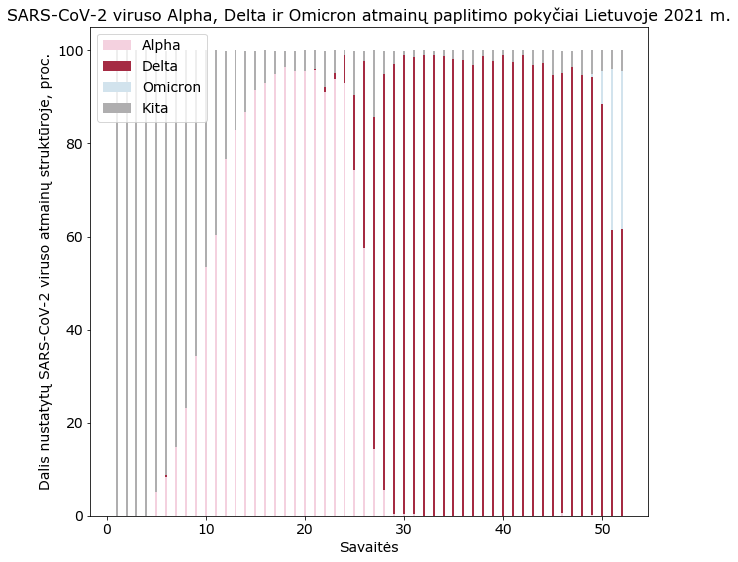

In [497]:
# generuojamas sąrašas verčių nuo 1 iki 52 savaitėms
savaiciu_sarasas = np.arange(1, 53)

# Grafikas
Alpha=((atmainos[atmainos['variant']=="B.1.1.7"])['percent_variant'].values)
Delta=((atmainos[atmainos['variant']=="B.1.617.2"])['percent_variant'].values)
Omicron=((atmainos[(atmainos['variant']=="BA.1") | (atmainos['variant']=="BA.2")].groupby('year_week').sum("percent_variant"))['percent_variant'].values)
Kita=((atmainos[(atmainos['variant'] != "B.1.1.7") & (atmainos['variant'] != "B.1.617.2") & (atmainos['variant'] != "BA.1") & (atmainos['variant'] != "BA.2")].groupby('year_week').sum("percent_variant"))['percent_variant'].values)

fig, ax = plt.subplots()
ax.bar(savaiciu_sarasas,Alpha, color='#f4d1df', label='Alpha', width=0.20)
ax.bar(savaiciu_sarasas,Delta, color='#a52b43', label='Delta', width=0.20, bottom = Alpha)
ax.bar(savaiciu_sarasas,Omicron, color='#d2e3ed', label='Omicron', width=0.20, bottom = Alpha+Delta)
ax.bar(savaiciu_sarasas,Kita, color='#afaeaf', label='Kita', width=0.20, bottom = Alpha+Delta+Omicron)
ax.set_ylabel('Dalis nustatytų SARS-CoV-2 viruso atmainų struktūroje, proc.', fontsize=14)
ax.set_xlabel('Savaitės', fontsize=14)
ax.set_title('SARS-CoV-2 viruso Alpha, Delta ir Omicron atmainų paplitimo pokyčiai Lietuvoje 2021 m.', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(["Alpha", "Delta", "Omicron", "Kita"] , fontsize=14)
fig.set_size_inches(10,9)
plt.show()

ANTRAS UŽDAVINYS

In [498]:
# atidaromas failas su patvirtintų COVID-19 ligos atvejų skaičiumi Lietuvoje

atvejai_visi = pd.read_csv('atvejai.csv')

atvejai_visi['date'] = pd.to_datetime(atvejai_visi['date'], format='%Y/%m/%d')
atvejai_visi['year'] = pd.DatetimeIndex(atvejai_visi.date).year
atvejai_visi['week_nr'] = pd.DatetimeIndex(atvejai_visi.date).week
atvejai=atvejai_visi[(atvejai_visi['year']==2021) & (atvejai_visi['week_nr']<=52)]

C:\Users\valerija\AppData\Local\Temp\ipykernel_6196\1568424727.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  atvejai_visi['week_nr'] = pd.DatetimeIndex(atvejai_visi.date).week


In [499]:
atvejai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143277 entries, 12152 to 303418
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   object_id          143277 non-null  int64         
 1   municipality_name  143277 non-null  object        
 2   date               143277 non-null  datetime64[ns]
 3   sex                143277 non-null  object        
 4   age_gr             143277 non-null  object        
 5   incidence          143277 non-null  int64         
 6   infection_1        143277 non-null  int64         
 7   infection_2        143277 non-null  int64         
 8   infection_3        143277 non-null  int64         
 9   infection_4        143277 non-null  int64         
 10  deaths_all         143277 non-null  int64         
 11  deaths_cov1        143277 non-null  int64         
 12  deaths_cov2        143277 non-null  int64         
 13  deaths_cov3        143277 non-null  int6

In [500]:
print(atvejai['sex'].unique())
print(atvejai['age_gr'].unique())

['Moteris' 'Vyras' 'Nenustatyta']
['0-9' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-89'
 '90-99' 'Nenustatyta' '100-109' '110-119']


In [501]:
# atidaromas failas su gyventojų skaičiumi, paimamos reikšmės - gyventojų skaičių Lietuvoje, gyventojų skaičių pagal amžiaus grupes, pagal lytį 2021 m.
#Duomenų šaltinis Lietuvos statistikos departamentas https://osp.stat.gov.lt/gyventojai1
gyventoju_sk2021_bendrai=pd.read_excel(io='gyventojai2021.xls', sheet_name='Iš viso')
gyventoju_sk2021_bendrai=gyventoju_sk2021_bendrai.drop(gyventoju_sk2021_bendrai.index[0:7])
gyventoju_sk2021_bendrai=gyventoju_sk2021_bendrai.drop(gyventoju_sk2021_bendrai.index[2:])

# Bendrai gyventojų
gyventoju_sk2021=gyventoju_sk2021_bendrai.iloc[1,1]

#Gyventojų pagal amžiaus grupes

#Amžiaus grupės:
#0-17m.; 18-24; 25-34; 35-44; 45-54; 55-64; 65-74; 75-84; daugiau nei 85 m.

Iki_9m=(gyventoju_sk2021_bendrai.iloc[1, 2:12].sum())
nuo_10_iki_19=(gyventoju_sk2021_bendrai.iloc[1, 12:22].sum())
nuo_20_iki_29=(gyventoju_sk2021_bendrai.iloc[1, 22:32].sum())
nuo_30_iki_39=(gyventoju_sk2021_bendrai.iloc[1, 32:34].sum())
nuo_40_iki_49=(gyventoju_sk2021_bendrai.iloc[1, 34:36].sum())
nuo_50_iki_59=(gyventoju_sk2021_bendrai.iloc[1, 36:38].sum())
nuo_60_iki_69=(gyventoju_sk2021_bendrai.iloc[1, 38:40].sum())
nuo_70_iki_79=(gyventoju_sk2021_bendrai.iloc[1, 40:42].sum())
nuo_80_ir_daugiau=(gyventoju_sk2021_bendrai.iloc[1, 42:44].sum())

#Gyventojų pagal lytį 
moteru_sk2021=pd.read_excel(io='gyventojai2021.xls', sheet_name='Moterys')
moteru_sk2021=moteru_sk2021.drop(moteru_sk2021.index[0:7])
moteru_sk2021=moteru_sk2021.drop(moteru_sk2021.index[2:])

moteru_sk2021=moteru_sk2021.iloc[1,1]


vyru_sk2021=pd.read_excel(io='gyventojai2021.xls', sheet_name='Vyrai')
vyru_sk2021=vyru_sk2021.drop(vyru_sk2021.index[0:7])
vyru_sk2021=vyru_sk2021.drop(vyru_sk2021.index[2:])

vyru_sk2021=vyru_sk2021.iloc[1,1]

Sergamumo COVID-19 liga dinamika Lietuvoje 2021 m.

In [502]:
# skaičiuojamas bendras visų gyventojų savaitinis sergamumas Lietuvoje 2021 m.
sergamumas_LT2021=atvejai
sergamumas_LT2021['week_nr1']=sergamumas_LT2021['week_nr']
sergamumas_LT2021=(sergamumas_LT2021.groupby(['week_nr'], as_index=False, sort=False).agg({"incidence":"sum", "deaths_cov1":"sum"}))
sergamumas_LT2021['savaitinis_sergamum']=(sergamumas_LT2021['incidence']/gyventoju_sk2021)*100000

C:\Users\valerija\AppData\Local\Temp\ipykernel_6196\3366389242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sergamumas_LT2021['week_nr1']=sergamumas_LT2021['week_nr']


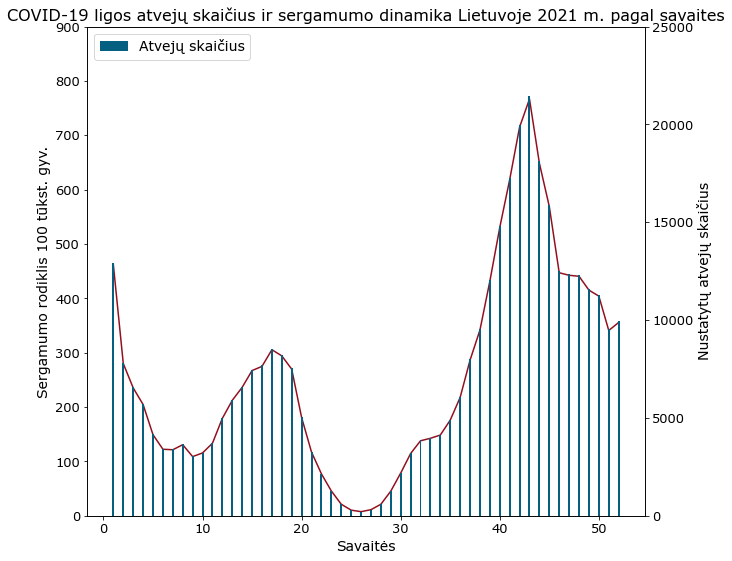

In [503]:
#Grafikas - atvejų skaičius ir sergamumas pagal savaites Lietuvoje 2021 m.
fig, ax1 = plt.subplots()
ax1.plot(sergamumas_LT2021['week_nr'].values,sergamumas_LT2021['savaitinis_sergamum'].values, color='#920f1d', label='Sergamumo rodiklis')
ax1.set_ylabel('Sergamumo rodiklis 100 tūkst. gyv.', fontsize=14)
ax1.set_xlabel('Savaitės', fontsize=14)
ax1.set_ylim(0, 900)
ax2=ax1.twinx()
ax2.bar(sergamumas_LT2021['week_nr'].values,sergamumas_LT2021['incidence'].values, color='#055f81', label='Atvejų skaičius', width=0.20)
ax2.set_ylabel('Nustatytų atvejų skaičius', fontsize=14)
ax2.set_ylim(0, 25000)
ax1.set_title('COVID-19 ligos atvejų skaičius ir sergamumo dinamika Lietuvoje 2021 m. pagal savaites', fontsize=16)
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=13)
ax2.tick_params(axis='y', labelsize=13)
ax.legend(['Sergamumo rodiklis'] , fontsize=14, loc=1)
ax2.legend(['Atvejų skaičius'] , fontsize=14, loc=2)
fig.set_size_inches(10, 9)
plt.show()

Vyrų ir moterų sergamumo palyginimas

In [504]:
atvejai2021VM=atvejai
atvejai2021VM["sex1"]=atvejai2021VM["sex"]
atvejai2021VM["week_nr1"]=atvejai2021VM["week_nr"]

atvejai2021VM=(atvejai2021VM[(atvejai2021VM["sex"]=="Vyras") | (atvejai2021VM["sex"]=="Moteris")]).groupby(["week_nr", "sex"], as_index=False, sort=False).agg({"incidence":"sum", "deaths_cov1":"sum"})

#Skaiciuojami savaitiniai vyrų ir moterų sergamumo rodikliai
atvejai2021VM["Savaitinis_sergamumas"]=np.where(atvejai2021VM.sex == "Moteris", (atvejai2021VM.incidence / moteru_sk2021 *100000), (atvejai2021VM.incidence / vyru_sk2021 *100000))

C:\Users\valerija\AppData\Local\Temp\ipykernel_6196\3616215874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atvejai2021VM["sex1"]=atvejai2021VM["sex"]
C:\Users\valerija\AppData\Local\Temp\ipykernel_6196\3616215874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atvejai2021VM["week_nr1"]=atvejai2021VM["week_nr"]


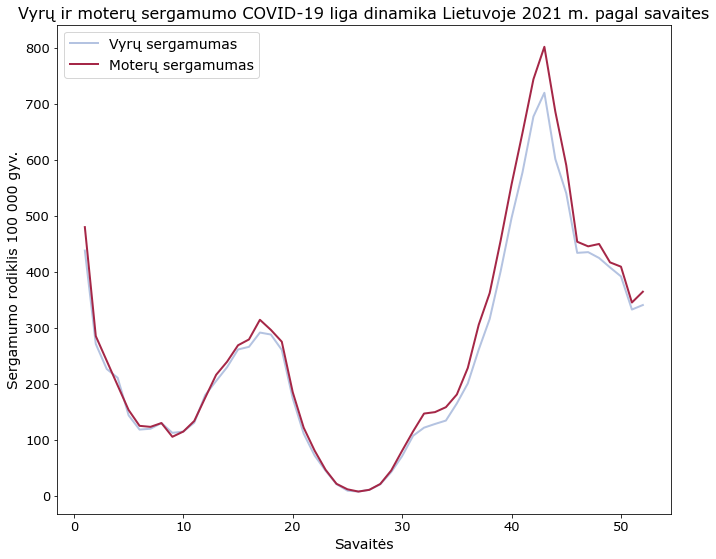

In [505]:
#Grafikas - vyrų ir moterų sergamumo COVID-19 liga dinamika Lietuvoje pagal savaites 2021 m.
fig, ax = plt.subplots()
ax.plot(((atvejai2021VM[atvejai2021VM['sex']=='Vyras'])['week_nr'].values), ((atvejai2021VM[atvejai2021VM['sex']=='Vyras'])['Savaitinis_sergamumas'].values), color='#b4c3e1', lw=2)
ax.plot(((atvejai2021VM[atvejai2021VM['sex']=='Moteris'])['week_nr'].values), ((atvejai2021VM[atvejai2021VM['sex']=='Moteris'])['Savaitinis_sergamumas'].values), color='#a52747', lw=2)
ax.set_title('Vyrų ir moterų sergamumo COVID-19 liga dinamika Lietuvoje 2021 m. pagal savaites', fontsize=16)
ax.set_ylabel('Sergamumo rodiklis 100 000 gyv.', fontsize=14)
ax.set_xlabel('Savaitės', fontsize=14)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(['Vyrų sergamumas', "Moterų sergamumas"] , fontsize=14, loc=0)
fig.set_size_inches(11,9)
plt.show()

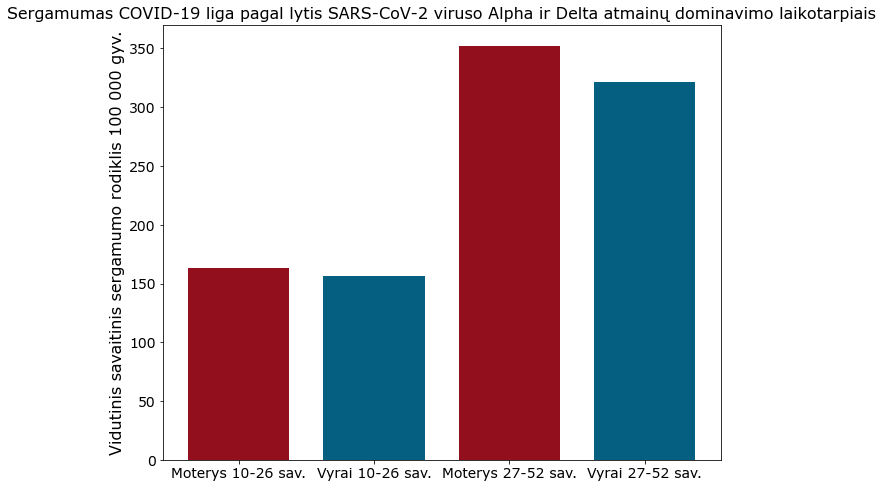

In [506]:
# Vidutiniai savaitiniai sergamumo rodikliai Alpha ir Delta atmainų dominavimo periodais
Sergamum_mot_Alpha=(atvejai2021VM[(atvejai2021VM['sex']=='Moteris') & (atvejai2021VM['week_nr'] >= 10) & (atvejai2021VM['week_nr'] <= 26)])["Savaitinis_sergamumas"].mean()
Sergamum_vyr_Alpha=(atvejai2021VM[(atvejai2021VM['sex']=='Vyras') & (atvejai2021VM['week_nr'] >= 10) & (atvejai2021VM['week_nr'] <= 26)])["Savaitinis_sergamumas"].mean()

Sergamum_mot_Delta=(atvejai2021VM[(atvejai2021VM['sex']=='Moteris') & (atvejai2021VM['week_nr'] >= 27) & (atvejai2021VM['week_nr'] <= 52)])["Savaitinis_sergamumas"].mean()
Sergamum_vyr_Delta=(atvejai2021VM[(atvejai2021VM['sex']=='Vyras') & (atvejai2021VM['week_nr'] >= 27) & (atvejai2021VM['week_nr'] <= 52)])["Savaitinis_sergamumas"].mean()

# Grafikas
x= [1, 4, 7, 10]
y = [Sergamum_mot_Alpha, Sergamum_vyr_Alpha, Sergamum_mot_Delta, Sergamum_vyr_Delta, ]
spalvos = ["#920f1d", "#055f81", "#920f1d", "#055f81"]
fig, ax = plt.subplots()
ax.bar(x,y, color = spalvos, width = 2.25)
ax.set_xticks([1, 4, 7, 10])
ax.set_xticklabels(['Moterys 10-26 sav.', 'Vyrai 10-26 sav.', 'Moterys 27-52 sav.', 'Vyrai 27-52 sav.'], fontsize=14)
ax.set_title('Sergamumas COVID-19 liga pagal lytis SARS-CoV-2 viruso Alpha ir Delta atmainų dominavimo laikotarpiais', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel('Vidutinis savaitinis sergamumo rodiklis 100 000 gyv.', fontsize=16)
fig.set_size_inches(10,8)
plt.show()

In [507]:
# Skaičiuojamas sergamumo rodiklių santykis

if Sergamum_mot_Alpha > Sergamum_vyr_Alpha:
    print("2021 m. 10-26 sav. moterų vidutinis savaitinis sergamumo rodiklis buvo", (round((Sergamum_mot_Alpha / Sergamum_vyr_Alpha), 2)), "kartų didesnis nei vyrų.")
elif Sergamum_mot_Alpha < Sergamum_vyr_Alpha:
    print("2021 m. 10-26 sav. vyrų vidutinis savaitinis sergamumo rodiklis buvo", (round((Sergamum_vyr_Alpha / Sergamum_mot_Alpha), 2)), "kartų didesnis nei moterų.")
else:
    print("2021 m. 10-26 sav. vyrų ir moterų vidutinis savaitinis sergamumas nesiskyrė.")

if Sergamum_mot_Delta > Sergamum_vyr_Delta:
    print("2021 m. 27-52 sav. moterų vidutinis savaitinis sergamumo rodiklis buvo", (round((Sergamum_mot_Delta / Sergamum_vyr_Delta), 2)), "kartų didesnis nei vyrų.")
elif Sergamum_mot_Delta < Sergamum_vyr_Delta:
    print("2021 m. 27-52 sav. vyrų vidutinis savaitinis sergamumo rodiklis buvo", (round((Sergamum_vyr_Delta / Sergamum_mot_Delta), 2)), "kartų didesnis nei moterų.")
else:
    print("2021 m. 27-52 sav. vyrų ir moterų vidutinis savaitinis sergamumas nesiskyrė.")

2021 m. 10-26 sav. moterų vidutinis savaitinis sergamumo rodiklis buvo 1.05 kartų didesnis nei vyrų.
2021 m. 27-52 sav. moterų vidutinis savaitinis sergamumo rodiklis buvo 1.1 kartų didesnis nei vyrų.


2021 m. 10-26 sav. moterų ir vyrų sergamumo rodiklių santykio 95 proc. PI 0,98; 1,11 p = 0,169 (apskaičiuota naudojant WinPepi (version 11.65) programą).

2021 m. 27-52 sav.  moterų ir vyrų sergamumo rodiklių santykio 95 proc. PI 1,05; 1,14 p < 0,001 (apskaičiuota naudojant WinPepi (version 11.65) programą).

Skirtingų amžiaus grupių sergamumo palyginimas

In [508]:
atvejai2021_amzius=atvejai
#Amžiaus gr. vienodinamos su turimais duomenimis apie gyventojų sk. iš Lietuvo statistikos departamento
atvejai2021_amzius['age_gr']=atvejai2021_amzius['age_gr'].replace('80-89', '>=80')
atvejai2021_amzius['age_gr']=atvejai2021_amzius['age_gr'].replace('90-99', '>=80')
atvejai2021_amzius['age_gr']=atvejai2021_amzius['age_gr'].replace('100-109', '>=80')
atvejai2021_amzius['age_gr']=atvejai2021_amzius['age_gr'].replace('110-119', '>=80')


C:\Users\valerija\AppData\Local\Temp\ipykernel_6196\1533406600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atvejai2021_amzius['age_gr']=atvejai2021_amzius['age_gr'].replace('80-89', '>=80')
C:\Users\valerija\AppData\Local\Temp\ipykernel_6196\1533406600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atvejai2021_amzius['age_gr']=atvejai2021_amzius['age_gr'].replace('90-99', '>=80')
C:\Users\valerija\AppData\Local\Temp\ipykernel_6196\1533406600.py:5: SettingWithCopyWarning: 
A value is trying to b

In [509]:
#Grupuojami kiekvienos amžiaus grupės atvejai pagal savaites
atvejai2021_amzius['age_gr1']=atvejai2021_amzius['age_gr']
atvejai2021_amzius['week_nr1']=atvejai2021_amzius['week_nr']
atvejai2021_amzius=(atvejai2021_amzius[atvejai2021_amzius["age_gr"]!="Nenustatyta"]).groupby(["week_nr", "age_gr"], as_index=False, sort=False).agg({"incidence":"sum", "deaths_cov1":"sum"})

#Skaičiuojamas savaitinis sergamumas (atskirame stulpelyje)
atvejai2021_amzius['savaitinis_sergamumas']=""

atvejai2021_amzius['savaitinis_sergamumas']=np.where(atvejai2021_amzius['age_gr'] == "0-9", (atvejai2021_amzius['incidence'] / Iki_9m *100000), atvejai2021_amzius['savaitinis_sergamumas'])
atvejai2021_amzius['savaitinis_sergamumas']=np.where(atvejai2021_amzius['age_gr'] == "10-19", (atvejai2021_amzius['incidence'] / nuo_10_iki_19 *100000), atvejai2021_amzius['savaitinis_sergamumas'])
atvejai2021_amzius['savaitinis_sergamumas']=np.where(atvejai2021_amzius['age_gr'] == "20-29", (atvejai2021_amzius['incidence'] / nuo_20_iki_29 *100000), atvejai2021_amzius['savaitinis_sergamumas'])
atvejai2021_amzius['savaitinis_sergamumas']=np.where(atvejai2021_amzius['age_gr'] == "30-39", (atvejai2021_amzius['incidence'] / nuo_30_iki_39 *100000), atvejai2021_amzius['savaitinis_sergamumas'])
atvejai2021_amzius['savaitinis_sergamumas']=np.where(atvejai2021_amzius['age_gr'] == "40-49", (atvejai2021_amzius['incidence'] / nuo_40_iki_49 *100000), atvejai2021_amzius['savaitinis_sergamumas'])
atvejai2021_amzius['savaitinis_sergamumas']=np.where(atvejai2021_amzius['age_gr'] == "50-59", (atvejai2021_amzius['incidence'] / nuo_50_iki_59 *100000), atvejai2021_amzius['savaitinis_sergamumas'])
atvejai2021_amzius['savaitinis_sergamumas']=np.where(atvejai2021_amzius['age_gr'] == "60-69", (atvejai2021_amzius['incidence'] / nuo_60_iki_69 *100000), atvejai2021_amzius['savaitinis_sergamumas'])
atvejai2021_amzius['savaitinis_sergamumas']=np.where(atvejai2021_amzius['age_gr'] == "70-79", (atvejai2021_amzius['incidence'] / nuo_70_iki_79 *100000), atvejai2021_amzius['savaitinis_sergamumas'])
atvejai2021_amzius['savaitinis_sergamumas']=np.where(atvejai2021_amzius['age_gr'] == ">=80", (atvejai2021_amzius['incidence'] / nuo_80_ir_daugiau *100000), atvejai2021_amzius['savaitinis_sergamumas'])


C:\Users\valerija\AppData\Local\Temp\ipykernel_6196\1211159463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atvejai2021_amzius['age_gr1']=atvejai2021_amzius['age_gr']
C:\Users\valerija\AppData\Local\Temp\ipykernel_6196\1211159463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atvejai2021_amzius['week_nr1']=atvejai2021_amzius['week_nr']


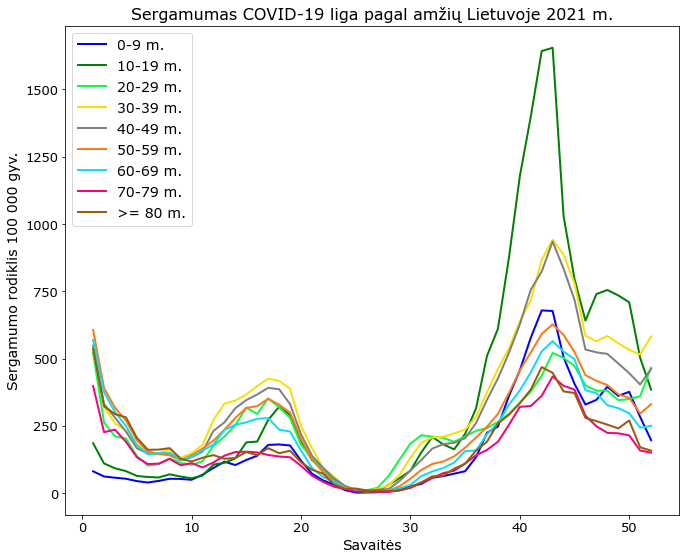

In [510]:
fig, ax = plt.subplots()


ax.plot(((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='0-9'])['week_nr'].values), ((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='0-9'])['savaitinis_sergamumas'].values), color='blue', lw=2)
ax.plot(((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='10-19'])['week_nr'].values), ((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='10-19'])['savaitinis_sergamumas'].values), color='green', lw=2)
ax.plot(((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='20-29'])['week_nr'].values), ((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='20-29'])['savaitinis_sergamumas'].values), color='#0EFA45', lw=2)
ax.plot(((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='30-39'])['week_nr'].values), ((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='30-39'])['savaitinis_sergamumas'].values), color='#FADF03', lw=2)
ax.plot(((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='40-49'])['week_nr'].values), ((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='40-49'])['savaitinis_sergamumas'].values), color='grey', lw=2)
ax.plot(((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='50-59'])['week_nr'].values), ((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='50-59'])['savaitinis_sergamumas'].values), color='#FA7A19', lw=2)
ax.plot(((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='60-69'])['week_nr'].values), ((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='60-69'])['savaitinis_sergamumas'].values), color='#0FDBF5', lw=2)
ax.plot(((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='70-79'])['week_nr'].values), ((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='70-79'])['savaitinis_sergamumas'].values), color='#F50280', lw=2)
ax.plot(((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='>=80'])['week_nr'].values), ((atvejai2021_amzius[atvejai2021_amzius['age_gr']=='>=80'])['savaitinis_sergamumas'].values), color='#995B09', lw=2)

ax.set_title("Sergamumas COVID-19 liga pagal amžių Lietuvoje 2021 m.", fontsize=16)
ax.set_ylabel('Sergamumo rodiklis 100 000 gyv.', fontsize=14)
ax.set_xlabel('Savaitės', fontsize=14)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(['0-9 m.', '10-19 m.', '20-29 m.', '30-39 m.', '40-49 m.', '50-59 m.', '60-69 m.', '70-79 m.', '>= 80 m.'] , fontsize=14, loc=0)
fig.set_size_inches(11,9)
plt.show()

In [511]:
# Skirtingų amžiaus grupių vidutinio savaitinio sergamumo rodiklių palyginimas Alpha dominavimo metu (10-26 sav.)

#skaičiuojamas vidurinis savaitinis sergamumo rodiklis kiekvienai amžiaus grupei
Alpha_iki9=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='0-9') & (atvejai2021_amzius['week_nr'] >= 10) & (atvejai2021_amzius['week_nr'] <= 26)])["savaitinis_sergamumas"].mean()
Alpha_10_19=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='10-19') & (atvejai2021_amzius['week_nr'] >= 10) & (atvejai2021_amzius['week_nr'] <= 26)])["savaitinis_sergamumas"].mean()
Alpha_20_29=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='20-29') & (atvejai2021_amzius['week_nr'] >= 10) & (atvejai2021_amzius['week_nr'] <= 26)])["savaitinis_sergamumas"].mean()
Alpha_30_39=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='30-39') & (atvejai2021_amzius['week_nr'] >= 10) & (atvejai2021_amzius['week_nr'] <= 26)])["savaitinis_sergamumas"].mean()
Alpha_40_49=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='40-49') & (atvejai2021_amzius['week_nr'] >= 10) & (atvejai2021_amzius['week_nr'] <= 26)])["savaitinis_sergamumas"].mean()
Alpha_50_59=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='50-59') & (atvejai2021_amzius['week_nr'] >= 10) & (atvejai2021_amzius['week_nr'] <= 26)])["savaitinis_sergamumas"].mean()
Alpha_60_69=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='60-69') & (atvejai2021_amzius['week_nr'] >= 10) & (atvejai2021_amzius['week_nr'] <= 26)])["savaitinis_sergamumas"].mean()
Alpha_70_79=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='70-79') & (atvejai2021_amzius['week_nr'] >= 10) & (atvejai2021_amzius['week_nr'] <= 26)])["savaitinis_sergamumas"].mean()
Alpha_80ir_daugiau=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='>=80') & (atvejai2021_amzius['week_nr'] >= 10) & (atvejai2021_amzius['week_nr'] <= 26)])["savaitinis_sergamumas"].mean()

Vidut_sav_alpha_amz={Alpha_iki9:"0-9 m.", Alpha_10_19:"10-19 m.", Alpha_20_29:"20-29 m.", Alpha_30_39:"30-39 m.", Alpha_40_49:"40-49 m.", Alpha_50_59:"50-59 m.", Alpha_60_69:"60-69 m.", Alpha_70_79:"70-79 m.", Alpha_80ir_daugiau:"80 m. ir daugiau"}

#Didžiausias ir mažiausias sergamumas Alpha dominavimo metu:
print("Didžiausias sergamumas Alpha atmainos dominavimo metu nustatytas", Vidut_sav_alpha_amz.get(max(Vidut_sav_alpha_amz)), "amžiaus grupėje.")
print("Mažiausias sergamumas Alpha atmainos dominavimo metu nustatytas", Vidut_sav_alpha_amz.get(min(Vidut_sav_alpha_amz)), "amžiaus grupėje.")

# Skirtingų amžiaus grupių vidutinio savaitinio sergamumo rodiklių palyginimas Delta dominavimo metu (27-52 sav.)
Delta_iki9=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='0-9') & (atvejai2021_amzius['week_nr'] >= 27) & (atvejai2021_amzius['week_nr'] <= 52)])["savaitinis_sergamumas"].mean()
Delta_10_19=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='10-19') & (atvejai2021_amzius['week_nr'] >= 27) & (atvejai2021_amzius['week_nr'] <= 52)])["savaitinis_sergamumas"].mean()
Delta_20_29=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='20-29') & (atvejai2021_amzius['week_nr'] >= 27) & (atvejai2021_amzius['week_nr'] <= 52)])["savaitinis_sergamumas"].mean()
Delta_30_39=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='30-39') & (atvejai2021_amzius['week_nr'] >= 27) & (atvejai2021_amzius['week_nr'] <= 52)])["savaitinis_sergamumas"].mean()
Delta_40_49=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='40-49') & (atvejai2021_amzius['week_nr'] >= 27) & (atvejai2021_amzius['week_nr'] <= 52)])["savaitinis_sergamumas"].mean()
Delta_50_59=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='50-59') & (atvejai2021_amzius['week_nr'] >= 27) & (atvejai2021_amzius['week_nr'] <= 52)])["savaitinis_sergamumas"].mean()
Delta_60_69=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='60-69') & (atvejai2021_amzius['week_nr'] >= 27) & (atvejai2021_amzius['week_nr'] <= 52)])["savaitinis_sergamumas"].mean()
Delta_70_79=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='70-79') & (atvejai2021_amzius['week_nr'] >= 27) & (atvejai2021_amzius['week_nr'] <= 52)])["savaitinis_sergamumas"].mean()
Delta_80ir_daugiau=(atvejai2021_amzius[(atvejai2021_amzius['age_gr']=='>=80') & (atvejai2021_amzius['week_nr'] >= 27) & (atvejai2021_amzius['week_nr'] <= 52)])["savaitinis_sergamumas"].mean()

Vidut_sav_delta_amz={Delta_iki9:"0-9 m.", Delta_10_19:"10-19 m.", Delta_20_29:"20-29 m.", Delta_30_39:"30-39 m.", Delta_40_49:"40-49 m.", Delta_50_59:"50-59 m.", Delta_60_69:"60-69 m.", Delta_70_79:"70-79 m.", Delta_80ir_daugiau:"80 m. ir daugiau"}

#Didžiausias ir mažiausias sergamumas Alpha dominavimo metu:
print("Didžiausias sergamumas Delta atmainos dominavimo metu nustatytas", Vidut_sav_delta_amz.get(max(Vidut_sav_delta_amz)), "amžiaus grupėje.")
print("Mažiausias sergamumas Delta atmainos dominavimo metu nustatytas", Vidut_sav_delta_amz.get(min(Vidut_sav_delta_amz)), "amžiaus grupėje.")

Didžiausias sergamumas Alpha atmainos dominavimo metu nustatytas 30-39 m. amžiaus grupėje.
Mažiausias sergamumas Alpha atmainos dominavimo metu nustatytas 0-9 m. amžiaus grupėje.
Didžiausias sergamumas Delta atmainos dominavimo metu nustatytas 10-19 m. amžiaus grupėje.
Mažiausias sergamumas Delta atmainos dominavimo metu nustatytas 70-79 m. amžiaus grupėje.


In [512]:
print("Alpha atmainos dominavimo periodu 30-39 m. amžiaus asmenų vidutinis savaitinis sergamumas buvo", round(Alpha_30_39/Alpha_iki9, 2), "karto didesnis nei 0-9 m. amžiaus asmenų.")
print("Delta atmainos dominavimo periodu 10-19 m. amžiaus asmenų vidutinis savaitinis sergamumas buvo", round(Delta_10_19/Delta_70_79, 2), "karto didesnis nei 70-79 m. amžiaus asmenų.")

Alpha atmainos dominavimo periodu 30-39 m. amžiaus asmenų vidutinis savaitinis sergamumas buvo 2.56 karto didesnis nei 0-9 m. amžiaus asmenų.
Delta atmainos dominavimo periodu 10-19 m. amžiaus asmenų vidutinis savaitinis sergamumas buvo 3.2 karto didesnis nei 70-79 m. amžiaus asmenų.


Alpha atmainos dominavimo periodu 30-39 m. ir 0-9 m. amžiaus asmenų sergamumo rodiklių santykio 95 proc. PI 2,06; 2,70 p < 0,001 (apskaičiuota naudojant WinPepi (version 11.65) programą).

Delta atmainos dominavimo periodu 10-19 m. ir 70-79 m. amžiaus asmenų sergamumo rodiklių antykio 95 proc. PI 2,83; 3,51 p < 0,001 (apskaičiuota naudojant WinPepi (version 11.65) programą ).

In [513]:
# Išvados:
# 1. 2021 m. Lietuvoje skirtingais laikotarpiais dominavo dvi susirūpinimą keliančios atmainos. 
# Alpha atmaina šalyje sekoskaitos metu nustatoma nuo 2021 m. 5 savaitės, šios atmainos dominavimo laikotarpis - 2021 m. nuo 10 iki 26 sav.
# Delta atmaina pirmą kartą nustatyta 2021 m. 6 sav., dominavimo laikotarpis 2021 m. nuo 27 iki 52 sav.
# Omicron atmaina pirmą kartą nustatyta 2021 m. 49 sav. ir jau 52 sav. sudarė net 33,9 proc. visų šalyje nustatomų atmainų.
# Kitos susirūpinimą keliančios atmainos (Beta ir Gamma) sekoskaitos metu buvo nustatomos rečiau ir Lietuvoje plačiai neišplito.

# 2.2021 m. moterų sergamumas buvo didesnis nei vyrų. Delta atmainos dominavimo laikotarpiu taip pat moterys sirgo daugiau, 
# Alpha atmainos dominavimo periodu skirtumas nenustatytas. Sergamumas skirtingose amžiaus grupėse skyrėsi priklausomai nuo vyraujančios atmainos. 
# Alpha atmainos dominavimo metu didžiausias sergamumas buvo būdingas 30-39 m., Delta – 10-19 m. amžiaus asmenims.

Išvados:
1. 2021 m. Lietuvoje skirtingais laikotarpiais dominavo dvi susirūpinimą keliančios atmainos. 
Alpha atmaina šalyje sekoskaitos metu nustatoma nuo 2021 m. 5 savaitės, šios atmainos dominavimo laikotarpis - 2021 m. nuo 10 iki 26 sav.
Delta atmaina pirmą kartą nustatyta 2021 m. 6 sav., dominavimo laikotarpis 2021 m. nuo 27 iki 52 sav.
Omicron atmaina pirmą kartą nustatyta 2021 m. 49 sav. ir jau 52 sav. sudarė net 33,9 proc. visų šalyje nustatomų atmainų.
Kitos susirūpinimą keliančios atmainos (Beta ir Gamma) sekoskaitos metu buvo nustatomos rečiau ir Lietuvoje plačiai neišplito.

2. 2021 m. moterų sergamumas buvo didesnis nei vyrų. Delta atmainos dominavimo laikotarpiu taip pat moterys sirgo daugiau, 
Alpha atmainos dominavimo periodu skirtumas nenustatytas. Sergamumas skirtingose amžiaus grupėse skyrėsi priklausomai nuo vyraujančios atmainos. 
Alpha atmainos dominavimo metu didžiausias sergamumas buvo būdingas 30-39 m., Delta – 10-19 m. amžiaus asmenims.